In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [ ]:
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')
train_df.head()

In [ ]:
test_df.head()

In [5]:
Train_df = train_df.copy()
Test_df = test_df.copy()

In [6]:
print(train_df.shape)
print(test_df.shape)

(2452, 8)
(1051, 7)


In [7]:
train_df.dtypes

Product           object
Product_Brand     object
Item_Category     object
Subcategory_1     object
Subcategory_2     object
Item_Rating      float64
Date              object
Selling_Price    float64
dtype: object

In [8]:
for col in test_df.columns:
    print(col, train_df[col].nunique(), test_df[col].nunique())

Product 2452 1051
Product_Brand 1010 494
Item_Category 75 47
Subcategory_1 130 93
Subcategory_2 336 194
Item_Rating 41 41
Date 483 318


In [9]:
len(set(train_df['Product'].unique()) - set(test_df['Product'].unique()))

2452

### Univariate and Bivariate Analysis

In [10]:
# predictor_columns = list(set(test_df.columns) - set(['Selling_Price']))
predictor_columns =  list(set(test_df.columns) - set(['Selling_Price', 'Product','Product_Brand']))

In [ ]:
fig, ax = plt.subplots(10,2,figsize = (15,100) )
i = 0
for col in predictor_columns:
    j = 0
    ax[i,j].scatter(train_df[col], train_df['Selling_Price'])
    ax[i,j].tick_params(colors='white', labelcolor = 'white')
    sns.countplot(train_df[col], ax = ax[i,j+1])
    ax[i,j+1].tick_params(colors='white', labelcolor = 'white')
    i+=1
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74]),
 <a list of 75 Text xticklabel objects>)

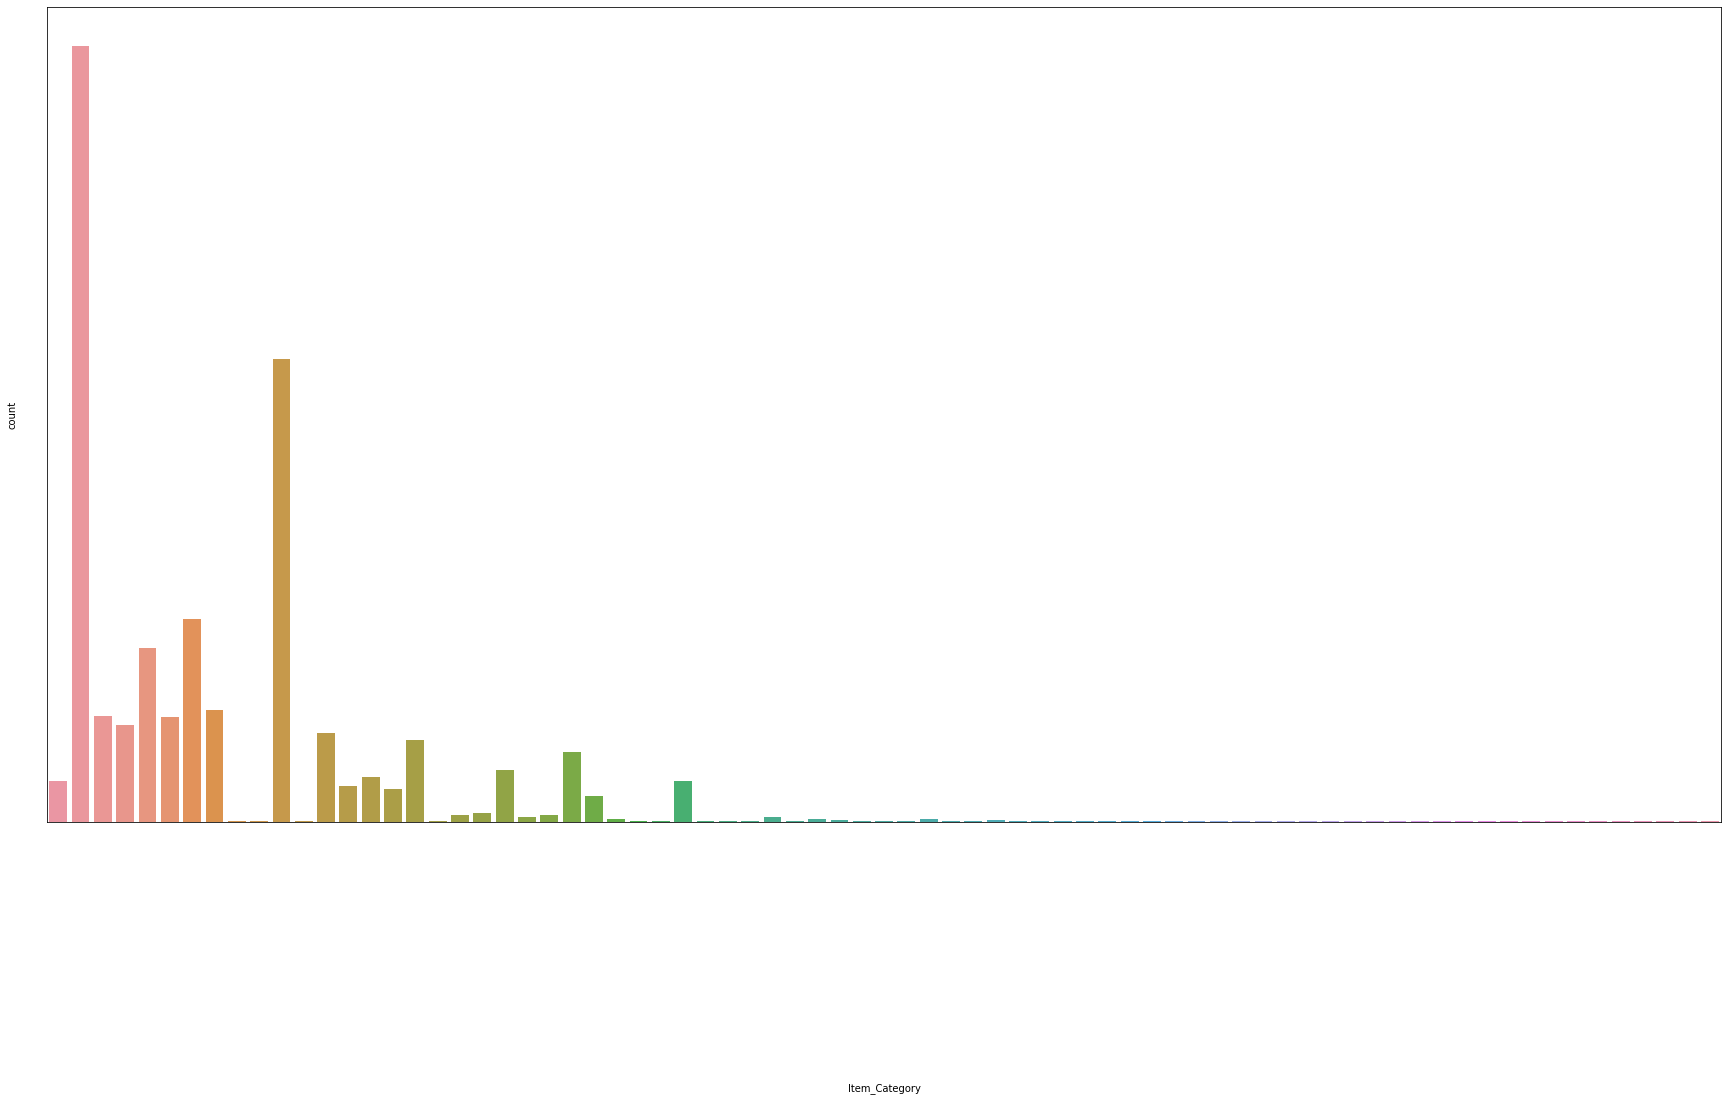

In [12]:

# plt.scatter(train_df['Item_Category'], train_df['Selling_Price'])
# plt.tick_params(colors='white', labelcolor = 'white')
plt.figure(figsize = (30,15))
sns.countplot(train_df['Item_Category'])
plt.tick_params(colors='white', labelcolor = 'white')
plt.xticks(rotation='vertical')

In [ ]:
t = train_df.groupby('Item_Category').count()[train_df.groupby('Item_Category').count()['Selling_Price'] < 5]['Selling_Price']
print(len(t))
t

In [14]:
train_df.loc[train_df[train_df['Item_Category'].isin(t.index) == True].index, 'Item_Category'] = '<5'

In [15]:
print(train_df['Item_Category'].nunique())
train_df['Item_Category'].unique()

24


array(['bags wallets belts', 'clothing', 'home decor festive needs',
       'beauty and personal care', 'footwear', 'kitchen dining',
       'automotive', 'computers', '<5', 'jewellery', 'home furnishing',
       'pens stationery', 'toys school supplies', 'furniture',
       'mobiles accessories', 'sunglasses', 'cameras accessories',
       'baby care', 'ebooks', 'home improvement', 'watches',
       'sports fitness', 'tools hardware', 'home entertainment'],
      dtype=object)

In [ ]:
test_not_in_train = set(Test_df['Item_Category'].unique()) - set(Train_df['Item_Category'].unique())
test_not_in_train

In [17]:
test_df.loc[test_df[test_df['Item_Category'].isin(list(t.index) + list(test_not_in_train)) == True].index, 'Item_Category'] = '<5'
print(test_df['Item_Category'].nunique())
test_df['Item_Category'].unique()

23


array(['computers', 'jewellery', 'clothing', 'mobiles accessories',
       'home entertainment', 'automotive', 'footwear',
       'beauty and personal care', '<5', 'toys school supplies',
       'watches', 'home decor festive needs', 'baby care',
       'kitchen dining', 'pens stationery', 'home furnishing',
       'cameras accessories', 'tools hardware', 'bags wallets belts',
       'sports fitness', 'furniture', 'sunglasses', 'home improvement'],
      dtype=object)

###### Do Categorical Encoding for Item_Category 

In [18]:
print(train_df['Item_Rating'].nunique(),sorted(train_df['Item_Rating'].unique()))
print(test_df['Item_Rating'].nunique(), sorted(test_df['Item_Rating'].unique()))

41 [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0]
41 [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0]


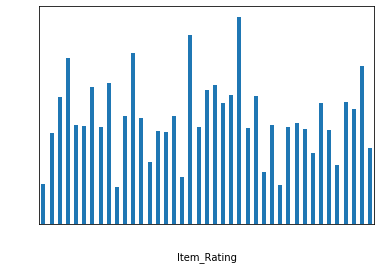

In [19]:
train_df.groupby('Item_Rating').mean()['Selling_Price'].plot(kind = 'bar')
plt.tick_params(colors='white', labelcolor = 'white')

In [20]:
train_df['Item_Rating'].dtype

dtype('float64')

In [21]:
train_df['Subcategory_1'].nunique()

130

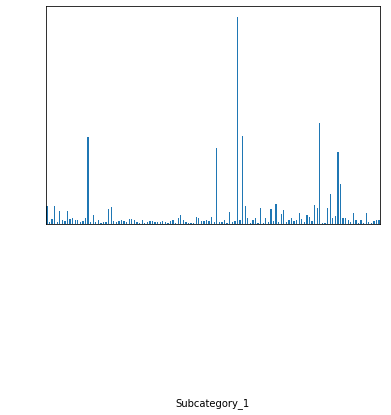

In [22]:
train_df.groupby('Subcategory_1').mean()['Selling_Price'].plot(kind = 'bar')
plt.tick_params(colors='white', labelcolor = 'white')

In [201]:
u = train_df.groupby('Subcategory_1').count()[train_df.groupby('Subcategory_1').count()['Selling_Price'] < 10]['Selling_Price']
print(len(u))
u

93


Subcategory_1
academic texts               4
action figures               8
art supplies                 1
audio players                3
baby bath skin               4
                            ..
team sports                  6
toy guns weapons             1
video players accessories    1
wallets clutches             4
watch accessories            1
Name: Selling_Price, Length: 93, dtype: int64

In [202]:
test_not_in_train = set(Test_df['Subcategory_1'].unique()) - set(Train_df['Subcategory_1'].unique())
test_not_in_train

{'aligatorr aviator sunglasses',
 'car accessories',
 'educational toys',
 'hardware',
 'indoor sports games',
 'laptops',
 'naaz toys school supplies',
 'soft toys',
 'storage',
 'storage feeding utensils',
 'suspenders',
 'true home decor festive needs'}

In [ ]:
train_df.loc[train_df[train_df['Subcategory_1'].isin(u.index) == True].index, 'Subcategory_1'] = '<10'
print(train_df['Subcategory_1'].nunique())
train_df['Subcategory_1'].unique()
test_df.loc[test_df[test_df['Subcategory_1'].isin(list(u.index) + list(test_not_in_train)) == True].index, 'Subcategory_1'] = '<10'
print(test_df['Subcategory_1'].nunique())
test_df['Subcategory_1'].unique()

In [26]:
train_df['Subcategory_2'].nunique()

336

In [ ]:
v = train_df.groupby('Subcategory_2').count()[train_df.groupby('Subcategory_2').count()['Selling_Price'] < 10]['Selling_Price']
print(len(v))
v

In [ ]:
test_not_in_train = set(Test_df['Subcategory_2'].unique()) - set(Train_df['Subcategory_2'].unique())
test_not_in_train

In [ ]:
train_df.loc[train_df[train_df['Subcategory_2'].isin(v.index) == True].index, 'Subcategory_2'] = '<10'
print(train_df['Subcategory_2'].nunique())
train_df['Subcategory_2'].unique()
test_df.loc[test_df[test_df['Subcategory_2'].isin(list(v.index) + list(test_not_in_train)) == True].index, 'Subcategory_2'] = '<10'
print(test_df['Subcategory_2'].nunique())
test_df['Subcategory_2'].unique()

In [34]:
train_df.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2/3/2017,291.0
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,7/1/2015,897.0
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,1/12/2019,792.0
3,P-4452,B-3078,beauty and personal care,eye care,<10,4.0,12/12/2014,837.0
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,12/12/2013,470.0


In [38]:
import matplotlib as mpl

In [40]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


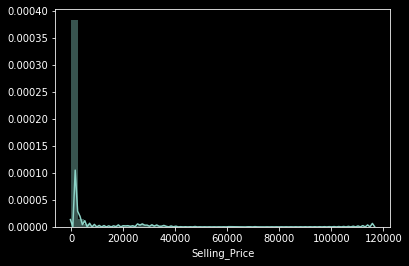

In [42]:
plt.style.use('dark_background')
sns.distplot(train_df['Selling_Price'])

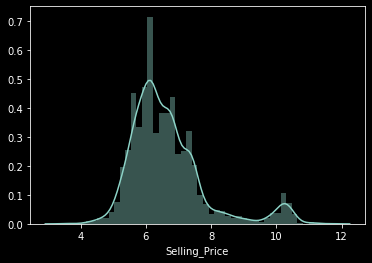

In [43]:
sns.distplot(np.log(train_df['Selling_Price']))

#### Encoding

In [ ]:
!pip install category_encoders

In [211]:
from category_encoders.target_encoder import TargetEncoder
cat_cols = ['Item_Category', 'Subcategory_1','Subcategory_2']
t_enc = TargetEncoder(cols = cat_cols)
t_enc.fit(train_df[cat_cols],train_df['Selling_Price'])
train_df = train_df.join(t_enc.transform(train_df[cat_cols]), rsuffix = '_target')
test_df = test_df.join(t_enc.transform(test_df[cat_cols]), rsuffix = '_target')
train_df.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price,Year,Month_sin,Month_cos,Day of week_sin,Day of week_cos,Day,Month,Day of week,Item_Category_target,Subcategory_1_target,Subcategory_2_target
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2017-03-02,291.0,2017,1.000000e+00,6.123234e-17,0.433884,-0.900969,2,3,3,1777.842105,1355.851852,1907.311299
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,2015-01-07,897.0,2015,5.000000e-01,8.660254e-01,0.974928,-0.222521,7,1,2,701.516039,630.235294,639.850187
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,2019-12-01,792.0,2019,-2.449294e-16,1.000000e+00,-0.781831,0.623490,1,12,6,1775.091837,1904.885714,1315.716950
3,P-4452,B-3078,beauty and personal care,<10,<10,4.0,2014-12-12,837.0,2014,-2.449294e-16,1.000000e+00,-0.433884,-0.900969,12,12,4,630.600000,3271.291188,2225.968966
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,2013-12-12,470.0,2013,-2.449294e-16,1.000000e+00,0.433884,-0.900969,12,12,3,701.516039,838.873563,523.245902


In [68]:
train_df['Date'] = pd.to_datetime(train_df['Date'], format='%d/%m/%Y')

In [70]:
test_df['Date'] = pd.to_datetime(test_df['Date'], format='%d/%m/%Y')

In [71]:
test_df.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Item_Category_target,Subcategory_1_target,Subcategory_2_target
0,P-11284,B-2984,computers,network components,routers,4.3,2018-12-01,2125.096154,3554.880952,3633.634146
1,P-6580,B-1732,jewellery,bangles bracelets armlets,bracelets,3.0,2012-12-20,8238.703271,952.961039,1646.000000
2,P-5843,B-3078,clothing,women s clothing,western wear,1.5,2014-12-01,701.516039,630.235294,639.850187
3,P-5334,B-1421,jewellery,necklaces chains,necklaces,3.9,2019-12-01,8238.703271,514.043750,511.632911
4,P-5586,B-3078,clothing,women s clothing,western wear,1.4,2017-12-01,701.516039,630.235294,639.850187


In [ ]:
train_df.dtypes

In [102]:
train_df['Day'] = train_df['Date'].dt.day
train_df['Month'] = train_df['Date'].dt.month
train_df['Year'] = train_df['Date'].dt.year

test_df['Day'] = test_df['Date'].dt.day
test_df['Month'] = test_df['Date'].dt.month
test_df['Year'] = test_df['Date'].dt.year

In [76]:
train_df.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price,Item_Category_target,Subcategory_1_target,Subcategory_2_target,Day,Month,Year
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2017-03-02,291.0,1777.842105,1355.851852,1907.311299,2,3,2017
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,2015-01-07,897.0,701.516039,630.235294,639.850187,7,1,2015
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,2019-12-01,792.0,1775.091837,1904.885714,1315.716950,1,12,2019
3,P-4452,B-3078,beauty and personal care,eye care,<10,4.0,2014-12-12,837.0,630.600000,1340.490580,2225.968966,12,12,2014
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,2013-12-12,470.0,701.516039,838.873563,523.245902,12,12,2013


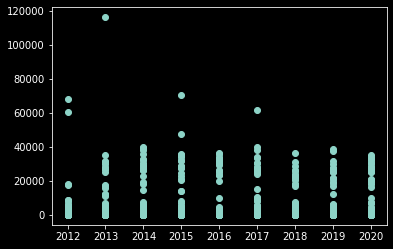

In [80]:
plt.scatter(train_df['Year'],train_df['Selling_Price'])

In [106]:
train_df['Year'] = train_df['Year'].astype('object') 
test_df['Year'] = test_df['Year'].astype('object') 

In [87]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price,Item_Category_target,Subcategory_1_target,Subcategory_2_target,Day,Month,Year,Day_sin,Day_cos
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2017-03-02,291.0,1777.842105,1355.851852,1907.311299,2,3,2017,0.394356,0.918958
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,2015-01-07,897.0,701.516039,630.235294,639.850187,7,1,2015,0.988468,0.151428
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,2019-12-01,792.0,1775.091837,1904.885714,1315.716950,1,12,2019,0.201299,0.979530
3,P-4452,B-3078,beauty and personal care,eye care,<10,4.0,2014-12-12,837.0,630.600000,1340.490580,2225.968966,12,12,2014,0.651372,-0.758758
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,2013-12-12,470.0,701.516039,838.873563,523.245902,12,12,2013,0.651372,-0.758758


In [104]:
train_df['Day of week'] = train_df['Date'].dt.weekday
test_df['Day of week'] = test_df['Date'].dt.weekday

In [ ]:
encode(train_df, 'Month', 12)
encode(test_df, 'Month', 12)

In [105]:
train_df.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price,Item_Category_target,Subcategory_1_target,Subcategory_2_target,Year,Month_sin,Month_cos,Day of week_sin,Day of week_cos,Day,Month,Day of week
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2017-03-02,291.0,1777.842105,1355.851852,1907.311299,2017,1.000000e+00,6.123234e-17,0.433884,-0.900969,2,3,3
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,2015-01-07,897.0,701.516039,630.235294,639.850187,2015,5.000000e-01,8.660254e-01,0.974928,-0.222521,7,1,2
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,2019-12-01,792.0,1775.091837,1904.885714,1315.716950,2019,-2.449294e-16,1.000000e+00,-0.781831,0.623490,1,12,6
3,P-4452,B-3078,beauty and personal care,eye care,<10,4.0,2014-12-12,837.0,630.600000,1340.490580,2225.968966,2014,-2.449294e-16,1.000000e+00,-0.433884,-0.900969,12,12,4
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,2013-12-12,470.0,701.516039,838.873563,523.245902,2013,-2.449294e-16,1.000000e+00,0.433884,-0.900969,12,12,3


In [ ]:
encode(train_df, 'Day of week', 7)
encode(test_df, 'Day of week', 7)

In [107]:
train_df.dtypes

Product                         object
Product_Brand                   object
Item_Category                   object
Subcategory_1                   object
Subcategory_2                   object
Item_Rating                    float64
Date                    datetime64[ns]
Selling_Price                  float64
Item_Category_target           float64
Subcategory_1_target           float64
Subcategory_2_target           float64
Year                            object
Month_sin                      float64
Month_cos                      float64
Day of week_sin                float64
Day of week_cos                float64
Day                              int64
Month                            int64
Day of week                      int64
dtype: object

### Model

In [122]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [148]:
train_df.columns

Index(['Product', 'Product_Brand', 'Item_Category', 'Subcategory_1',
       'Subcategory_2', 'Item_Rating', 'Date', 'Selling_Price',
       'Item_Category_target', 'Subcategory_1_target', 'Subcategory_2_target',
       'Year', 'Month_sin', 'Month_cos', 'Day of week_sin', 'Day of week_cos',
       'Day', 'Month', 'Day of week'],
      dtype='object')

In [149]:
predictors = ['Item_Category', 'Subcategory_1',
       'Subcategory_2', 'Item_Rating', 'Date','Day of week', 'Month','Day',
       'Item_Category_target', 'Subcategory_1_target', 'Subcategory_2_target',
       'Year', 'Month_sin', 'Month_cos', 'Day of week_sin', 'Day of week_cos']
X = train_df[predictors]
y = np.log(train_df['Selling_Price']) #Removing Skew
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((1961, 16), (1961,), (491, 16), (491,))

In [117]:
cbr = CatBoostRegressor(l2_leaf_reg=5,
                        learning_rate = 0.15,
                        eval_metric = 'RMSE',
                        iterations = 100,
                        loss_function = 'RMSE',
                        depth=15,
                        cat_features = ['Item_Category', 'Subcategory_1', 'Subcategory_2'])

In [ ]:
cbr.fit(X_train, y_train,eval_set=(X_valid,y_valid), plot=True)

In [ ]:
cbr = CatBoostRegressor(eval_metric = 'RMSE',
                        iterations = 100,
                        loss_function = 'RMSE',
                        cat_features = ['Item_Category', 'Subcategory_1', 'Subcategory_2'],
                       random_state = 0)
params = {'depth' : [8,10,11,12] , 'l2_leaf_reg' : [4,5], 'learning_rate': [0.15,0.2, 0.25] }
grid = GridSearchCV(estimator = cbr, param_grid=params,cv=5,scoring='neg_mean_squared_error')
grid.fit(X, y)
print('Score',grid.best_score_)
print('Params',grid.best_params_)

In [151]:
print('Score',grid.best_score_)
print('Params',grid.best_params_)
# Score -0.4909714899599379
# Params {'depth': 10, 'l2_leaf_reg': 4, 'learning_rate': 0.15}
# Score -0.49023147385805094
# Params {'depth': 10, 'l2_leaf_reg': 5, 'learning_rate': 0.15}
# Score -0.4588788888174776
# Params {'depth': 8, 'l2_leaf_reg': 5, 'learning_rate': 0.15}

Score -0.4588788888174776
Params {'depth': 8, 'l2_leaf_reg': 5, 'learning_rate': 0.15}


In [152]:
-0.4588788888174776 > -0.49023147385805094

True

In [ ]:
cbr_1 = CatBoostRegressor(l2_leaf_reg=4,
                        learning_rate = 0.15,
                        eval_metric = 'RMSE',
                        iterations = 100,
                        loss_function = 'RMSE',
                        depth=10,
                        cat_features = ['Item_Category', 'Subcategory_1', 'Subcategory_2'],random_state = 0)
cbr_1.fit(X_train, y_train,eval_set=(X_valid,y_valid), plot=True)

In [ ]:
#Fit Full
cbr_2 = CatBoostRegressor(l2_leaf_reg=4,
                        learning_rate = 0.15,
                        eval_metric = 'RMSE',
                        iterations = 100,
                        loss_function = 'RMSE',
                        depth=10,
                        cat_features = ['Item_Category', 'Subcategory_1', 'Subcategory_2'],random_state = 0)
cbr_2.fit(X, y, plot=True)

In [130]:
test_df.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Item_Category_target,Subcategory_1_target,Subcategory_2_target,Year,Month_sin,Month_cos,Day of week_sin,Day of week_cos,Day,Month,Day of week
0,P-11284,B-2984,computers,network components,routers,4.3,2018-12-01,2125.096154,3554.880952,3633.634146,2018,-2.449294e-16,1.0,-0.974928,-0.222521,1,12,5
1,P-6580,B-1732,jewellery,bangles bracelets armlets,bracelets,3.0,2012-12-20,8238.703271,952.961039,1646.000000,2012,-2.449294e-16,1.0,0.433884,-0.900969,20,12,3
2,P-5843,B-3078,clothing,women s clothing,western wear,1.5,2014-12-01,701.516039,630.235294,639.850187,2014,-2.449294e-16,1.0,0.000000,1.000000,1,12,0
3,P-5334,B-1421,jewellery,necklaces chains,necklaces,3.9,2019-12-01,8238.703271,514.043750,511.632911,2019,-2.449294e-16,1.0,-0.781831,0.623490,1,12,6
4,P-5586,B-3078,clothing,women s clothing,western wear,1.4,2017-12-01,701.516039,630.235294,639.850187,2017,-2.449294e-16,1.0,-0.433884,-0.900969,1,12,4


In [133]:
predictions = cbr_2.predict(test_df[predictors])
predictions = np.exp(predictions)

In [134]:
submissions_df = pd.DataFrame({'Selling_Price' : predictions})
submissions_df.to_excel('submission_1.xlsx', index = False)

In [135]:
cbr_2.shrink(50)
predictions = cbr_2.predict(test_df[predictors])
predictions = np.exp(predictions)
submissions_df = pd.DataFrame({'Selling_Price' : predictions})
submissions_df.to_excel('submission_2.xlsx', index = False)

In [144]:
predictors

['Item_Category',
 'Subcategory_1',
 'Subcategory_2',
 'Item_Rating',
 'Item_Category_target',
 'Subcategory_1_target',
 'Subcategory_2_target',
 'Year',
 'Month_sin',
 'Month_cos',
 'Day of week_sin',
 'Day of week_cos']

In [ ]:
cbr_3 = CatBoostRegressor(l2_leaf_reg=5,
                        learning_rate = 0.15,
                        eval_metric = 'RMSE',
                        iterations = 100,
                        loss_function = 'RMSE',
                        depth=10,
                        cat_features = ['Item_Category', 'Subcategory_1', 'Subcategory_2'],random_state = 0)
cbr_3.fit(X_train, y_train,eval_set=(X_valid,y_valid), plot=True)

In [ ]:
#Fit Full
cbr_3 = CatBoostRegressor(l2_leaf_reg=5,
                        learning_rate = 0.15,
                        eval_metric = 'RMSE',
                        iterations = 100,
                        loss_function = 'RMSE',
                        depth=10,
                        cat_features = ['Item_Category', 'Subcategory_1', 'Subcategory_2'],random_state = 0)
cbr_3.fit(X, y, plot=True)

In [145]:
# cbr_3.shrink(50)
predictions = cbr_3.predict(test_df[predictors])
predictions = np.exp(predictions)
submissions_df = pd.DataFrame({'Selling_Price' : predictions})
submissions_df.to_excel('submission_3.xlsx', index = False)

In [ ]:
cbr_4 = CatBoostRegressor(l2_leaf_reg=5,
                        learning_rate = 0.1,
                        eval_metric = 'RMSE',
                        iterations = 100,
                        loss_function = 'RMSE',
                        depth=8,
                        cat_features = ['Item_Category', 'Subcategory_1', 'Subcategory_2'],random_state = 0)
cbr_4.fit(X_train, y_train,eval_set=(X_valid,y_valid), plot=True)

In [ ]:
#Fit Full
cbr_4 = CatBoostRegressor(l2_leaf_reg=5,
                        learning_rate = 0.1,
                        eval_metric = 'RMSE',
                        iterations = 100,
                        loss_function = 'RMSE',
                        depth=8,
                        cat_features = ['Item_Category', 'Subcategory_1', 'Subcategory_2'],random_state = 0)
cbr_4.fit(X, y, plot=True)

In [159]:
cbr_4.shrink(67)
predictions = cbr_4.predict(test_df[predictors])
predictions = np.exp(predictions)
submissions_df = pd.DataFrame({'Selling_Price' : predictions})
submissions_df.to_excel('submission_5.xlsx', index = False)

In [ ]:
pd.DataFrame(cbr_4.feature_importances_, predictors).sort_values(by = [0], ascending = False)

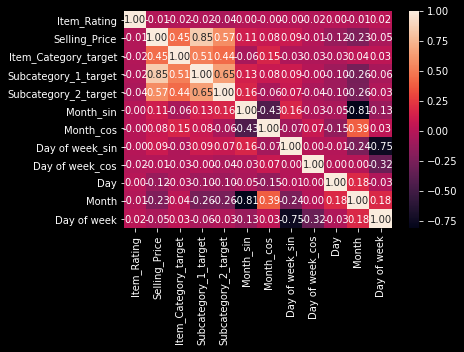

In [178]:
sns.heatmap(train_df.corr(), annot=True, fmt=".2f")

In [184]:
predictors = list(set(predictors) - set(['Day of week', 'Day of week_cos', 'Item_Rating','Month_sin']))
print(predictors)
X = train_df[predictors]
y = np.log(train_df['Selling_Price']) #Removing Skew
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

['Month_cos', 'Subcategory_2_target', 'Year', 'Item_Category', 'Month', 'Date', 'Day', 'Item_Category_target', 'Subcategory_1_target', 'Subcategory_2', 'Day of week_sin', 'Subcategory_1']


((1961, 12), (1961,), (491, 12), (491,))

In [ ]:
cbr = CatBoostRegressor(eval_metric = 'RMSE',
                        iterations = 100,
                        loss_function = 'RMSE',
                        cat_features = ['Item_Category', 'Subcategory_1', 'Subcategory_2', 'Year'],
                       random_state = 0)
params = {'depth' : [7,8,10,11] , 'l2_leaf_reg' : [4,5], 'learning_rate': [0.05,0.1,0.15] }
grid = GridSearchCV(estimator = cbr, param_grid=params,cv=5,scoring='neg_mean_squared_error')
grid.fit(X, y)
print('Score',grid.best_score_)
print('Params',grid.best_params_)

In [186]:
print('Score',grid.best_score_)
print('Params',grid.best_params_)

Score -0.4475523404354574
Params {'depth': 7, 'l2_leaf_reg': 5, 'learning_rate': 0.1}


In [ ]:
cbr = CatBoostRegressor(eval_metric = 'RMSE',
                        iterations = 100,
                        loss_function = 'RMSE',
                        cat_features = ['Item_Category', 'Subcategory_1', 'Subcategory_2', 'Year'],
                       random_state = 0)
params = {'depth' : [4,5,6] , 'l2_leaf_reg' : [4,5], 'learning_rate': [0.05,0.1,0.15] }
grid = GridSearchCV(estimator = cbr, param_grid=params,cv=5,scoring='neg_mean_squared_error')
grid.fit(X, y)

In [188]:
print('Score',grid.best_score_)
print('Params',grid.best_params_)

Score -0.44644282591312817
Params {'depth': 6, 'l2_leaf_reg': 4, 'learning_rate': 0.1}


In [ ]:
cbr_3 = CatBoostRegressor(l2_leaf_reg=4,
                        learning_rate = 0.1,
                        eval_metric = 'RMSE',
                        iterations = 100,
                        loss_function = 'RMSE',
                        depth=6,
                        cat_features = ['Item_Category', 'Subcategory_1', 'Subcategory_2','Year'],random_state = 0)
cbr_3.fit(X_train, y_train,eval_set=(X_valid,y_valid), plot=True)

In [ ]:
#Fit Full
cbr_4 = CatBoostRegressor(l2_leaf_reg=4,
                        learning_rate = 0.1,
                        eval_metric = 'RMSE',
                        iterations = 100,
                        loss_function = 'RMSE',
                        depth=6,
                        cat_features = ['Item_Category', 'Subcategory_1', 'Subcategory_2','Year'],random_state = 0)
cbr_4.fit(X, y, plot=True)

In [191]:
# cbr_4.shrink(67)
predictions = cbr_4.predict(test_df[predictors])
predictions = np.exp(predictions)
submissions_df = pd.DataFrame({'Selling_Price' : predictions})
submissions_df.to_excel('submission_6.xlsx', index = False)

In [192]:
pd.DataFrame(cbr_4.feature_importances_, predictors).sort_values(by = [0], ascending = False)

,0
Subcategory_1_target,54.711054
Subcategory_2_target,13.916969
Day,7.507209
Item_Category_target,4.958513
Item_Category,4.205512
Month_cos,3.964237
Subcategory_2,3.727451
Date,2.169634
Month,1.277199
Day of week_sin,1.265741


In [204]:
train_df['Subcategory_1'].unique()

array(['bags', 'women s clothing', 'showpieces', '<10', 'men s clothing',
       'table decor handicrafts', 'women s footwear', 'cookware',
       'wall decor clocks', 'accessories spare parts', 'unknown', 'rings',
       'laptop accessories', 'coffee mugs', 'kids clothing',
       'necklaces chains', 'network components',
       'bangles bracelets armlets', 'fragrances', 'school supplies',
       'accessories', 'pet furniture', 'car bike accessories',
       'tablet accessories', 'combos and kits', 'tools', 'infant wear',
       'office supplies', 'kitchen tools', 'mobile accessories',
       'wrist watches', 'men s footwear', 'bed linen',
       'curtains accessories', 'bath linen', 'makeup', 'jewellery sets',
       'earrings'], dtype=object)

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price,Item_Category_target,Subcategory_1_target,...,Month_sin,Month_cos,Day of week_sin,Day of week_cos,Day,Month,Day of week,Item_Category_target,Subcategory_1_target,Subcategory_2_target
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2017-03-02,291.0,1777.842105,1355.851852,...,1.000000e+00,6.123234e-17,0.433884,-0.900969,2,3,3,1777.842105,1355.851852,1907.311299
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,2015-01-07,897.0,701.516039,630.235294,...,5.000000e-01,8.660254e-01,0.974928,-0.222521,7,1,2,701.516039,630.235294,639.850187
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,2019-12-01,792.0,1775.091837,1904.885714,...,-2.449294e-16,1.000000e+00,-0.781831,0.623490,1,12,6,1775.091837,1904.885714,1315.716950
3,P-4452,B-3078,beauty and personal care,<10,<10,4.0,2014-12-12,837.0,630.600000,1340.490580,...,-2.449294e-16,1.000000e+00,-0.433884,-0.900969,12,12,4,630.600000,3271.291188,2225.968966
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,2013-12-12,470.0,701.516039,838.873563,...,-2.449294e-16,1.000000e+00,0.433884,-0.900969,12,12,3,701.516039,838.873563,523.245902


In [217]:
train_df['Subcategory_1'] = Train_df['Subcategory_1']
train_df['Subcategory_2'] = Train_df['Subcategory_2']
train_df['Item_Category'] = Train_df['Item_Category']

In [218]:
train_df.drop(['Item_Category_target', 'Subcategory_1_target','Subcategory_2_target'], axis = 1, inplace= True)

In [219]:
test_df.drop(['Item_Category_target', 'Subcategory_1_target','Subcategory_2_target'], axis = 1, inplace= True)

In [220]:
test_df['Subcategory_1'] = Test_df['Subcategory_1']
test_df['Subcategory_2'] = Test_df['Subcategory_2']
test_df['Item_Category'] = Test_df['Item_Category']

In [221]:
from category_encoders.target_encoder import TargetEncoder
cat_cols = ['Item_Category', 'Subcategory_1','Subcategory_2']
t_enc = TargetEncoder(cols = cat_cols)
t_enc.fit(train_df[cat_cols],train_df['Selling_Price'])
train_df = train_df.join(t_enc.transform(train_df[cat_cols]), rsuffix = '_target')
test_df = test_df.join(t_enc.transform(test_df[cat_cols]), rsuffix = '_target')
train_df.head()

,Product,Product_Brand,Item_Rating,Date,Selling_Price,Year,Month_sin,Month_cos,Day of week_sin,Day of week_cos,Day,Month,Day of week,Subcategory_1,Subcategory_2,Item_Category,Item_Category_target,Subcategory_1_target,Subcategory_2_target
0,P-2610,B-659,4.3,2017-03-02,291.0,2017,1.000000e+00,6.123234e-17,0.433884,-0.900969,2,3,3,bags,hand bags,bags wallets belts,1777.842105,1355.851852,1907.311299
1,P-2453,B-3078,3.1,2015-01-07,897.0,2015,5.000000e-01,8.660254e-01,0.974928,-0.222521,7,1,2,women s clothing,western wear,clothing,701.516039,630.235294,639.850187
2,P-6802,B-1810,3.5,2019-12-01,792.0,2019,-2.449294e-16,1.000000e+00,-0.781831,0.623490,1,12,6,showpieces,ethnic,home decor festive needs,1775.091837,1904.885714,1315.716950
3,P-4452,B-3078,4.0,2014-12-12,837.0,2014,-2.449294e-16,1.000000e+00,-0.433884,-0.900969,12,12,4,eye care,h2o plus eye care,beauty and personal care,630.600000,1340.490580,2494.375612
4,P-8454,B-3078,4.3,2013-12-12,470.0,2013,-2.449294e-16,1.000000e+00,0.433884,-0.900969,12,12,3,men s clothing,t shirts,clothing,701.516039,838.873563,523.245902


In [225]:
print(train_df['Subcategory_2'].nunique())
test_df['Subcategory_2'].nunique()

336


194

In [226]:
predictors = list(set(predictors) - set(['Day of week', 'Day of week_cos', 'Item_Rating','Month_sin']))
print(predictors)
X = train_df[predictors]
y = np.log(train_df['Selling_Price']) #Removing Skew
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

['Month_cos', 'Subcategory_2_target', 'Year', 'Item_Category', 'Month', 'Date', 'Day', 'Item_Category_target', 'Subcategory_1_target', 'Subcategory_2', 'Day of week_sin', 'Subcategory_1']


((1961, 12), (1961,), (491, 12), (491,))

In [ ]:
cbr_3 = CatBoostRegressor(l2_leaf_reg=4,
                        learning_rate = 0.1,
                        eval_metric = 'RMSE',
                        iterations = 100,
                        loss_function = 'RMSE',
                        depth=6,
                        cat_features = ['Item_Category', 'Subcategory_1', 'Subcategory_2','Year'],random_state = 0)
cbr_3.fit(X_train, y_train,eval_set=(X_valid,y_valid), plot=True)

In [ ]:
#Fit Full
cbr_4 = CatBoostRegressor(l2_leaf_reg=4,
                        learning_rate = 0.1,
                        eval_metric = 'RMSE',
                        iterations = 100,
                        loss_function = 'RMSE',
                        depth=6,
                        cat_features = ['Item_Category', 'Subcategory_1', 'Subcategory_2','Year'],random_state = 0)
cbr_4.fit(X, y, plot=True)

In [229]:
# cbr_4.shrink(67)
predictions = cbr_4.predict(test_df[predictors])
predictions = np.exp(predictions)
submissions_df = pd.DataFrame({'Selling_Price' : predictions})
submissions_df.to_excel('submission_7.xlsx', index = False)

In [230]:
pd.DataFrame(cbr_4.feature_importances_, predictors).sort_values(by = [0], ascending = False)

,0
Subcategory_1_target,45.710274
Subcategory_2_target,23.174701
Day,6.414482
Month_cos,4.229155
Subcategory_2,4.090881
Item_Category_target,3.526745
Month,3.053832
Item_Category,2.925945
Subcategory_1,2.778443
Date,1.447838


In [ ]:
cbr = CatBoostRegressor(eval_metric = 'RMSE',
                        iterations = 100,
                        loss_function = 'RMSE',
                        cat_features = ['Item_Category', 'Subcategory_1', 'Subcategory_2', 'Year'],
                       random_state = 0)
params = {'depth' : [4,5,6] , 'l2_leaf_reg' : [4,5], 'learning_rate': [0.05,0.1,0.15] }
grid = GridSearchCV(estimator = cbr, param_grid=params,cv=5,scoring='neg_mean_squared_error')
grid.fit(X, y)

In [232]:
print(grid.best_score_)
print(grid.best_params_)

-0.42678894726878697
{'depth': 6, 'l2_leaf_reg': 5, 'learning_rate': 0.1}


In [237]:
print(grid.scores)

AttributeError: 'GridSearchCV' object has no attribute 'scores'

In [ ]:
cbr_3 = CatBoostRegressor(l2_leaf_reg=5,
                        learning_rate = 0.1,
                        eval_metric = 'RMSE',
                        iterations = 100,
                        loss_function = 'RMSE',
                        depth=6,
                        cat_features = ['Item_Category', 'Subcategory_1', 'Subcategory_2','Year'],random_state = 0)
cbr_3.fit(X_train, y_train,eval_set=(X_valid,y_valid), plot=True)

In [ ]:
#Fit Full
cbr_4 = CatBoostRegressor(l2_leaf_reg=5,
                        learning_rate = 0.1,
                        eval_metric = 'RMSE',
                        iterations = 110,
                        loss_function = 'RMSE',
                        depth=6,
                        cat_features = ['Item_Category', 'Subcategory_1', 'Subcategory_2','Year'],random_state = 0)
cbr_4.fit(X, y, plot=True)

In [239]:
# cbr_4.shrink(67)
predictions = cbr_4.predict(test_df[predictors])
predictions = np.exp(predictions)
submissions_df = pd.DataFrame({'Selling_Price' : predictions})
submissions_df.to_excel('submission_8.xlsx', index = False)

In [241]:
pd.DataFrame(cbr_4.feature_importances_, predictors).sort_values(by = [0], ascending = False)

,0
Subcategory_1_target,45.221954
Subcategory_2_target,24.456500
Day,7.410030
Month_cos,3.961275
Item_Category_target,3.785753
Subcategory_2,3.761751
Item_Category,3.124916
Month,2.726225
Subcategory_1,2.257299
Date,1.442667


In [242]:
predictors = list(set(predictors) - set(['Day of week', 'Day of week_cos', 'Item_Rating','Month_sin','Day of week_sin']))
print(predictors)
X = train_df[predictors]
y = np.log(train_df['Selling_Price']) #Removing Skew
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

['Month_cos', 'Subcategory_2_target', 'Year', 'Item_Category', 'Month', 'Date', 'Day', 'Item_Category_target', 'Subcategory_1_target', 'Subcategory_2', 'Subcategory_1']


((1961, 11), (1961,), (491, 11), (491,))

In [ ]:
cbr = CatBoostRegressor(eval_metric = 'RMSE',
                        iterations = 100,
                        loss_function = 'RMSE',
                        cat_features = ['Item_Category', 'Subcategory_1', 'Subcategory_2', 'Year'],
                       random_state = 0)
params = {'depth' : [7,8] , 'l2_leaf_reg' : [4,5], 'learning_rate': [0.05,0.1,0.15] }
grid = GridSearchCV(estimator = cbr, param_grid=params,cv=5,scoring='neg_mean_squared_error')
grid.fit(X, y)

In [247]:
print(grid.best_score_)
print(grid.best_params_)
# -0.4167730754621665
# {'depth': 6, 'l2_leaf_reg': 5, 'learning_rate': 0.15}

-0.4175121698194406
{'depth': 8, 'l2_leaf_reg': 5, 'learning_rate': 0.1}


In [ ]:
cbr_3 = CatBoostRegressor(l2_leaf_reg=5,
                        learning_rate = 0.15,
                        eval_metric = 'RMSE',
                        iterations = 100,
                        loss_function = 'RMSE',
                        depth=6,
                        cat_features = ['Item_Category', 'Subcategory_1', 'Subcategory_2','Year'],random_state = 0)
cbr_3.fit(X_train, y_train,eval_set=(X_valid,y_valid), plot=True)

In [ ]:
#Fit Full
cbr_4 = CatBoostRegressor(l2_leaf_reg=5,
                        learning_rate = 0.15,
                        eval_metric = 'RMSE',
                        iterations = 140,
                        loss_function = 'RMSE',
                        depth=6,
                        cat_features = ['Item_Category', 'Subcategory_1', 'Subcategory_2','Year'],random_state = 0)
cbr_4.fit(X, y, plot=True)

In [249]:
cbr_4.shrink(120)
predictions = cbr_4.predict(test_df[predictors])
predictions = np.exp(predictions)
submissions_df = pd.DataFrame({'Selling_Price' : predictions})
submissions_df.to_excel('submission_9.xlsx', index = False)

In [250]:
pd.DataFrame(cbr_4.feature_importances_, predictors).sort_values(by = [0], ascending = False)

,0
Subcategory_1_target,39.222551
Subcategory_2_target,24.197816
Day,8.107650
Month_cos,5.952246
Subcategory_2,4.667582
Item_Category_target,3.986235
Date,3.339871
Subcategory_1,3.322092
Item_Category,3.182607
Year,2.192528


In [ ]:
xgboost = XGBRegressor(colsample_bytree=0.5, learning_rate=0.05, max_depth=9,
             min_child_weight=4, n_estimators=150, subsample=0.7,objective="reg:squarederror")

xgboost.fit(train_x, train_y)


rf = RandomForestRegressor(bootstrap=True, max_features=0.45,
                           min_samples_leaf=1, min_samples_split=5, n_estimators=100)
rf.fit(train_x, train_y)


lgbm = LGBMRegressor(n_estimators=250, num_leaves=127, max_depth=8,min_child_samples=4,
                      learning_rate=0.02, colsample_bytree=0.4, reg_alpha=0.5, reg_lambda=2)
lgbm.fit(train_x, train_y)


gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=7, max_features='sqrt', min_samples_leaf=15,
                                min_samples_split=10, loss='huber', random_state =42)
gb.fit(train_x, train_y)